In [35]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy import constants as c

#Graphing constants
pagewidth = (8.5,5)
colours = ['#EF476F', '#FFD166', '#06D6A0', '#118AB2', '#073B4C']

[(2.907498134398721e-15, 1.4168524387574922e-16), (-1.0001564990660496, 0.0830778254342494)]
6.62607004e-34 4.658325535953248e-34


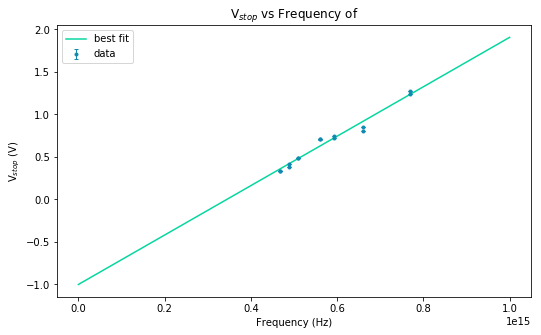

In [64]:
data = np.loadtxt('data/dataset.txt', skiprows=1, usecols=(0,2))
new_data = np.array([(c.c/(data[i,0]*10**(-9)), data[i,1]) for i in range(len(data))])
u = np.array([0.001 for i in range(len(new_data))])

def w_to_f(wavelength):
    return c

def linear(x, a, b):
    return a*x + b

popt, pcov = curve_fit(linear, new_data[:,0], new_data[:,1], sigma=u)

plt.figure(figsize=pagewidth)
plt.errorbar(new_data[:,0], new_data[:,1], yerr=u, elinewidth=1.0, capthick=1.0, capsize=2.0, fmt='.', 
             color=colours[3], label='data')
space = np.linspace(0, 10**15, 1000)
#space = np.linspace(new_data[0,0], new_data[-1,0], 1000)
plt.plot(space, linear(space, popt[0], popt[1]), color=colours[2], label='best fit')
#plt.plot(space, linear(space, c.h/c.e, popt[1]), color=colours[1], label='actual fit')
plt.xlabel('Frequency (Hz)')
plt.ylabel('V$_{stop}$ (V)')
plt.title('V$_{stop}$ vs Frequency of ')
plt.legend()
plt.savefig('graphs/vvf.png', bbox_inches='tight')

print([(popt[i], np.sqrt(pcov[i,i])) for i in range(2)])
print(c.h, c.e*popt[0])

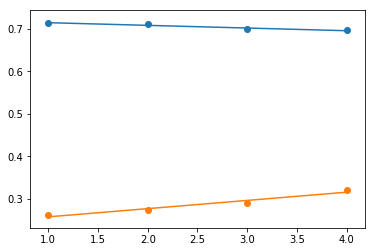

In [13]:
data2 = np.loadtxt('data/data2.txt', skiprows=1)

popt2, pcov2 = curve_fit(linear, data2[:,0], data2[:,2])
popt3, pcov3 = curve_fit(linear, data2[:,0], data2[:,3])

space = np.linspace(data2[0,0], data2[-1,0], 1000)
plt.plot(space, linear(space, popt2[0], popt2[1]))
plt.plot(space, linear(space, popt3[0], popt3[1]))
plt.scatter(data2[:,0], data2[:,2])
plt.scatter(data2[:,0], data2[:,3])
plt.show()

In [ ]:
'''
total potential 524 mV
196.768827 = 524/e
time difference = 156.0micro s
'''